In [76]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz 

from sklearn.model_selection import train_test_split,RepeatedKFold,GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor, export_graphviz 
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay

## Predicting Life Expectancy at Birth using Global Demographic Data


Problem:
- Life expectancy at birth is a major indicator of a country’s overall health
- It is important for someone to understand their life expectancy (financial planning, healthcare planning, etc)
- We want to see if we can accurately predict average life expectancy at birth using demographic data from countries all over the world
- Will also help us determine which factors play the largest role in predicting life expectancy

Question: Can we accurately predict someone’s life expectancy given specific demographic factors?

Which ML model is the best to predict average life expectancy?
- Decision trees?
- Clustering?
- Random forests?
- kNN?

Addition question we need to explore... should we build different models for males and females?



In [142]:
data = pd.read_csv("/Users/kendallscherer/Desktop/ds3001_v2/DS-3001/JTERM/UN_demo.csv",encoding='unicode_escape', header=1)
data


/var/folders/6m/rxmrjq2j1ds281fy_bft3klr0000gn/T/ipykernel_99432/3902540806.py:1: DtypeWarning: Columns (3,15,16,17,19,21,25,26,27,28,29,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,49,50,51,52,53,54,55,56,57,58,59,60,61,62,64) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/Users/kendallscherer/Desktop/ds3001_v2/DS-3001/JTERM/UN_demo.csv",encoding='unicode_escape', header=1)


,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,1,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,581,498,240,272,208,379,430,325,0,0
1,2,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,567,490,231,258,204,368,416,319,0,0
2,3,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,546,477,219,240,197,353,396,310,0,0
3,4,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,536,470,213,233,193,345,386,304,0,0
4,5,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,523,458,206,224,187,335,375,296,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20591,20592,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876.0,Country/Area,957,...,92,103,31,27,34,83,82,83,- 0,-16.7
20592,20593,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876.0,Country/Area,957,...,99,89,29,29,29,80,89,72,- 0,-14.4
20593,20594,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876.0,Country/Area,957,...,78,80,24,22,26,67,69,64,- 0,-14.5
20594,20595,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876.0,Country/Area,957,...,86,86,27,25,28,73,76,70,- 0,-7.1


In [143]:
columns_to_drop = ['Index', 'Variant', 'Notes', 'Location code', 'ISO2 Alpha-code', 
                   'SDMX code**', 'Parent code', 'Total Population, as of 1 January (thousands)', 
                   'Population Annual Doubling Time (years)', 'Population Change (thousands)', 'Population Change (thousands)', 'Male Population, as of 1 July (thousands)',
                   'Births (thousands)', 'Births by women aged 15 to 19 (thousands)', 'Female Population, as of 1 July (thousands)', 'Total Deaths (thousands)', 'Male Deaths (thousands)',
                   'Female Deaths (thousands)', 'Male Life Expectancy at Birth (years)', 'Female Life Expectancy at Birth (years)', 'Male Life Expectancy at Age 15 (years)', 'Female Life Expectancy at Age 15 (years)',
                   'Male Life Expectancy at Age 65 (years)', 'Female Life Expectancy at Age 65 (years)', 'Male Life Expectancy at Age 80 (years)', 'Female Life Expectancy at Age 80 (years)', 'Infant Deaths, under age 1 (thousands)',
                   'Live Births Surviving to Age 1 (thousands)', 'Under-Five Deaths, under age 5 (thousands)', 'Male Mortality before Age 40 (deaths under age 40 per 1,000 male live births)', 'Female Mortality before Age 40 (deaths under age 40 per 1,000 female live births)',
                   'Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)', 'Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)', 'Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)',
                   'Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)', 'Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)', 'Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)',
                   'Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)', 'Net Number of Migrants (thousands)']

data = data.drop(columns_to_drop, axis=1)

In [144]:
data

#eventuually drop country names and just use their alpha 3 code 
# # sort by type - only keep country/area!!!
# only years after 2000               

,"Region, subregion, country or area *",ISO3 Alpha-code,Type,Year,"Total Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)","Natural Change, Births minus Deaths (thousands)","Rate of Natural Change (per 1,000 population)",...,"Life Expectancy at Birth, both sexes (years)","Life Expectancy at Age 15, both sexes (years)","Life Expectancy at Age 65, both sexes (years)","Life Expectancy at Age 80, both sexes (years)","Infant Mortality Rate (infant deaths per 1,000 live births)","Under-Five Mortality (deaths under age 5 per 1,000 live births)","Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)","Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Net Migration Rate (per 1,000 population)"
0,WORLD,NaN,World,1950.0,2 499 322,19.2,99.3,22.2,43 295,17.3,...,46.5,47.0,11.3,5.0,143.4,224,372,540,379,0
1,WORLD,NaN,World,1951.0,2 543 130,19.5,99.4,22.2,44 322,17.4,...,47.1,47.5,11.3,5.0,141.3,219,362,529,368,0
2,WORLD,NaN,World,1952.0,2 590 271,19.9,99.4,22.1,49 960,19.3,...,48.2,48.3,11.6,5.1,137.3,212,347,512,353,0
3,WORLD,NaN,World,1953.0,2 640 279,20.2,99.5,22.0,50 057,19.0,...,48.8,48.6,11.6,5.1,134.5,207,340,503,345,0
4,WORLD,NaN,World,1954.0,2 691 979,20.6,99.5,22.0,53 345,19.8,...,49.6,49.1,11.8,5.3,131.7,202,330,491,335,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20591,Wallis and Futuna Islands,WLF,Country/Area,2017.0,12,85.3,93.6,33.8,0,6.0,...,77.5,63.8,17.5,8.4,12.5,15,28,97,83,-16.7
20592,Wallis and Futuna Islands,WLF,Country/Area,2018.0,12,84.4,93.3,34.4,0,5.6,...,77.9,64.0,17.7,8.6,11.8,14,26,93,80,-14.4
20593,Wallis and Futuna Islands,WLF,Country/Area,2019.0,12,83.7,93.1,35.0,0,6.1,...,79.6,65.6,18.8,9.2,10.1,12,22,79,67,-14.5
20594,Wallis and Futuna Islands,WLF,Country/Area,2020.0,12,83.2,93.0,35.5,0,5.2,...,78.8,64.9,18.3,8.9,10.9,13,24,86,73,-7.1


In [145]:
just_countries = data[data['Type'] == 'Country/Area']
just_countries = just_countries.drop(['Region, subregion, country or area *'], axis=1)


In [146]:
years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
just_countries_years = just_countries[just_countries['Year'].isin(years)]
just_countries_years

,ISO3 Alpha-code,Type,Year,"Total Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)","Natural Change, Births minus Deaths (thousands)","Rate of Natural Change (per 1,000 population)",Population Growth Rate (percentage),...,"Life Expectancy at Birth, both sexes (years)","Life Expectancy at Age 15, both sexes (years)","Life Expectancy at Age 65, both sexes (years)","Life Expectancy at Age 80, both sexes (years)","Infant Mortality Rate (infant deaths per 1,000 live births)","Under-Five Mortality (deaths under age 5 per 1,000 live births)","Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)","Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Net Migration Rate (per 1,000 population)"
1782,BDI,Country/Area,2000.0,6 308,243.1,97.0,14.7,168,26.6,2.03,...,47.5,44.6,11.3,4.9,95.3,157,373,553,431,-6.3
1783,BDI,Country/Area,2001.0,6 466,249.2,97.0,14.9,178,27.6,2.91,...,48.4,45.2,11.5,5.0,92.4,151,361,539,420,1.5
1784,BDI,Country/Area,2002.0,6 649,256.2,97.1,15.1,195,29.3,2.68,...,49.9,46.4,11.7,5.1,89.1,145,340,514,394,-2.5
1785,BDI,Country/Area,2003.0,6 861,264.4,97.1,15.3,209,30.5,3.58,...,50.9,47.0,11.9,5.1,86.0,139,326,498,381,5.4
1786,BDI,Country/Area,2004.0,7 120,274.4,97.2,15.5,227,31.9,3.85,...,52.0,47.8,12.0,5.2,82.4,132,310,480,365,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20591,WLF,Country/Area,2017.0,12,85.3,93.6,33.8,0,6.0,-1.11,...,77.5,63.8,17.5,8.4,12.5,15,28,97,83,-16.7
20592,WLF,Country/Area,2018.0,12,84.4,93.3,34.4,0,5.6,-0.92,...,77.9,64.0,17.7,8.6,11.8,14,26,93,80,-14.4
20593,WLF,Country/Area,2019.0,12,83.7,93.1,35.0,0,6.1,-0.8,...,79.6,65.6,18.8,9.2,10.1,12,22,79,67,-14.5
20594,WLF,Country/Area,2020.0,12,83.2,93.0,35.5,0,5.2,-0.22,...,78.8,64.9,18.3,8.9,10.9,13,24,86,73,-7.1


In [147]:
#just renaming a few for now
just_countries_years = just_countries_years.rename(columns={'Total Population, as of 1 July (thousands)': 'Total Pop', 'Male Population, as of 1 July (thousands)': 'Male Pop', 
                                                            'Female Population, as of 1 July (thousands)': 'Female Pop', 'Population Density, as of 1 July (persons per square km)': 'Population Density'})
just_countries_years


,ISO3 Alpha-code,Type,Year,Total Pop,Population Density,"Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)","Natural Change, Births minus Deaths (thousands)","Rate of Natural Change (per 1,000 population)",Population Growth Rate (percentage),...,"Life Expectancy at Birth, both sexes (years)","Life Expectancy at Age 15, both sexes (years)","Life Expectancy at Age 65, both sexes (years)","Life Expectancy at Age 80, both sexes (years)","Infant Mortality Rate (infant deaths per 1,000 live births)","Under-Five Mortality (deaths under age 5 per 1,000 live births)","Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)","Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Net Migration Rate (per 1,000 population)"
1782,BDI,Country/Area,2000.0,6 308,243.1,97.0,14.7,168,26.6,2.03,...,47.5,44.6,11.3,4.9,95.3,157,373,553,431,-6.3
1783,BDI,Country/Area,2001.0,6 466,249.2,97.0,14.9,178,27.6,2.91,...,48.4,45.2,11.5,5.0,92.4,151,361,539,420,1.5
1784,BDI,Country/Area,2002.0,6 649,256.2,97.1,15.1,195,29.3,2.68,...,49.9,46.4,11.7,5.1,89.1,145,340,514,394,-2.5
1785,BDI,Country/Area,2003.0,6 861,264.4,97.1,15.3,209,30.5,3.58,...,50.9,47.0,11.9,5.1,86.0,139,326,498,381,5.4
1786,BDI,Country/Area,2004.0,7 120,274.4,97.2,15.5,227,31.9,3.85,...,52.0,47.8,12.0,5.2,82.4,132,310,480,365,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20591,WLF,Country/Area,2017.0,12,85.3,93.6,33.8,0,6.0,-1.11,...,77.5,63.8,17.5,8.4,12.5,15,28,97,83,-16.7
20592,WLF,Country/Area,2018.0,12,84.4,93.3,34.4,0,5.6,-0.92,...,77.9,64.0,17.7,8.6,11.8,14,26,93,80,-14.4
20593,WLF,Country/Area,2019.0,12,83.7,93.1,35.0,0,6.1,-0.8,...,79.6,65.6,18.8,9.2,10.1,12,22,79,67,-14.5
20594,WLF,Country/Area,2020.0,12,83.2,93.0,35.5,0,5.2,-0.22,...,78.8,64.9,18.3,8.9,10.9,13,24,86,73,-7.1


In [148]:
just_countries_years.replace('...', np.nan, inplace=True)


/Users/kendallscherer/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/kendallscherer/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


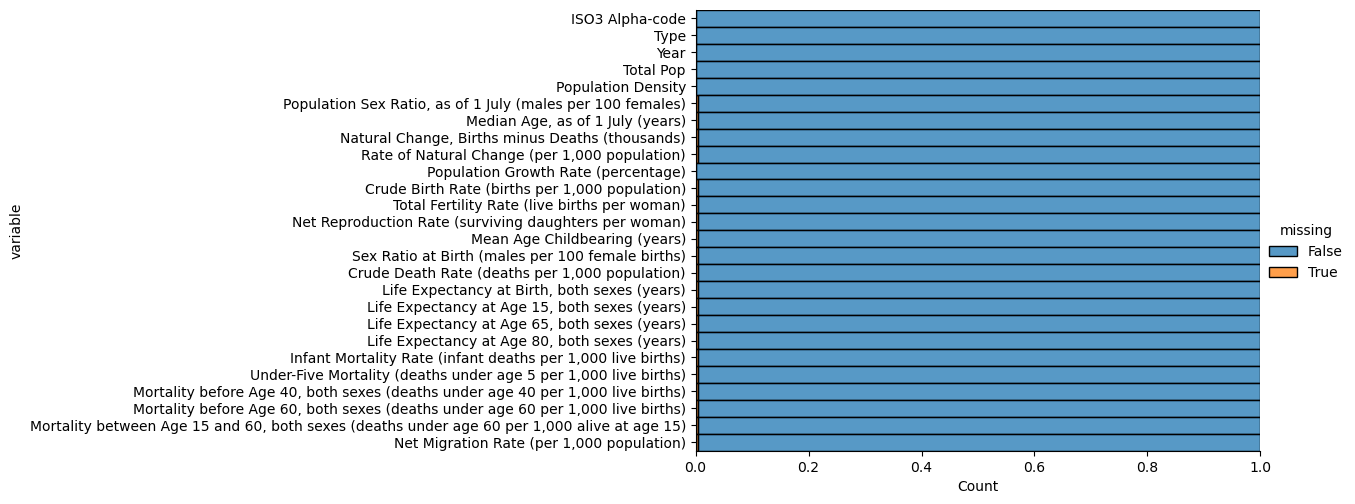

In [149]:
import seaborn as sns
sns.displot(
    data=just_countries_years.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

#no missing values!!!

In [150]:
#drop the one column with a bunch of NAs and then delete the rest of the NAs
just_countries_years = just_countries_years.dropna()

/Users/kendallscherer/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/kendallscherer/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


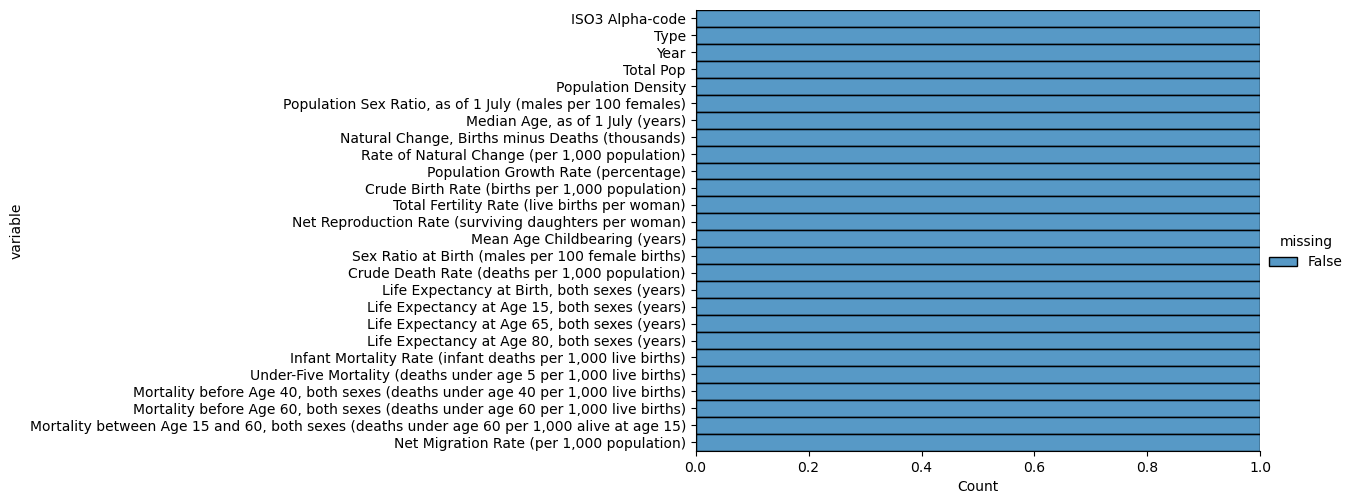

In [151]:
import seaborn as sns
sns.displot(
    data=just_countries_years.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [152]:
just_countries_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5192 entries, 1782 to 20595
Data columns (total 26 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   ISO3 Alpha-code                                                                              5192 non-null   object 
 1   Type                                                                                         5192 non-null   object 
 2   Year                                                                                         5192 non-null   float64
 3   Total Pop                                                                                    5192 non-null   object 
 4   Population Density                                                                           5192 non-null   object 
 5   Population Sex Ratio, as of 1 July 

In [153]:
data2 = just_countries_years 

In [154]:
#just_countries_years['Life Expectancy at Birth, both sexes (years)'] = pd.to_numeric(just_countries_years['Life Expectancy at Birth, both sexes (years)'], errors='coerce')


In [155]:
#target variable: Life Expectancy at Birth, both sexes (years)
#just_countries_years['Life Expectancy at Birth, both sexes (years)'].value_counts()
#just_countries_years['Life Expectancy at Birth, both sexes (years)'] = just_countries_years['Life Expectancy at Birth, both sexes (years)'].astype(float)
#just_countries_years['Life Expectancy at Birth, both sexes (years)'].describe()



In [156]:
#x = just_countries_years['Life Expectancy at Birth, both sexes (years)']
#bins = [0,69.3,76,100]
#labels=['low','middle','high']
#just_countries_years['Life Expectancy at Birth, both sexes (years)'] = pd.cut(x, bins, labels) 

In [157]:
#just_countries_years['Life Expectancy at Birth, both sexes (years)'].value_counts()
#low = 42-69.3
#middle = 69.3-76
#high = 76-86.5


In [158]:
#new_labels = ['Small', 'Moderate', 'Large']  # Define new labels for the bins here
#new_labels = ['low','middle','high']
#just_countries_years['Life Expectancy at Birth, both sexes (years)'] = just_countries_years['Life Expectancy at Birth, both sexes (years)'].cat.rename_categories(new_labels)

In [159]:
# Plotting using Seaborn for a categorical bar plot
#plt.figure(figsize=(10, 6))
#sns.countplot(x='Life Expectancy at Birth, both sexes (years)', hue='Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)', data=just_countries_years, palette='viridis')

In [160]:
#convert births into a numeric

#just_countries_years['Births (thousands)'] = just_countries_years['Births (thousands)'].replace(" ","")
#just_countries_years['Births (thousands)'] = just_countries_years['Births (thousands)'].replace("  ","")
#just_countries_years['Births (thousands)'] = just_countries_years['Births (thousands)'].astype(float)


In [161]:
# Function to remove spaces and convert to float
#CONVERTING OBJECTS TO FLOATS!!! - DO THIS TO LIKE ALL THE COLUMNS!!!
import re

def remove_spaces_and_convert_to_float(value):
    if isinstance(value, str):
        try:
            value_without_space = re.sub(r'\s+', '', value)
            return float(value_without_space)
        except ValueError:
            print(f"Could not convert to float: {value}")
            return None  # or any other handling for invalid values
    else:
        return value

# Apply the function to the column
just_countries_years['Total Pop'] = just_countries_years['Total Pop'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Population Density'] = just_countries_years['Population Density'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Population Sex Ratio, as of 1 July (males per 100 females)'] = just_countries_years['Population Sex Ratio, as of 1 July (males per 100 females)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Median Age, as of 1 July (years)'] = just_countries_years['Median Age, as of 1 July (years)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Natural Change, Births minus Deaths (thousands)'] = just_countries_years['Natural Change, Births minus Deaths (thousands)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Rate of Natural Change (per 1,000 population)'] = just_countries_years['Rate of Natural Change (per 1,000 population)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Population Growth Rate (percentage)'] = just_countries_years['Population Growth Rate (percentage)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Crude Birth Rate (births per 1,000 population)'] = just_countries_years['Crude Birth Rate (births per 1,000 population)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Total Fertility Rate (live births per woman)'] = just_countries_years['Total Fertility Rate (live births per woman)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Net Reproduction Rate (surviving daughters per woman)'] = just_countries_years['Net Reproduction Rate (surviving daughters per woman)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Mean Age Childbearing (years)'] = just_countries_years['Mean Age Childbearing (years)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Sex Ratio at Birth (males per 100 female births)'] = just_countries_years['Sex Ratio at Birth (males per 100 female births)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Crude Death Rate (deaths per 1,000 population)'] = just_countries_years['Crude Death Rate (deaths per 1,000 population)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Life Expectancy at Birth, both sexes (years)'] = just_countries_years['Life Expectancy at Birth, both sexes (years)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Life Expectancy at Age 15, both sexes (years)'] = just_countries_years['Life Expectancy at Age 15, both sexes (years)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Life Expectancy at Age 65, both sexes (years)'] = just_countries_years['Life Expectancy at Age 65, both sexes (years)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Life Expectancy at Age 80, both sexes (years)'] = just_countries_years['Life Expectancy at Age 80, both sexes (years)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Infant Mortality Rate (infant deaths per 1,000 live births)'] = just_countries_years['Infant Mortality Rate (infant deaths per 1,000 live births)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Under-Five Mortality (deaths under age 5 per 1,000 live births)'] = just_countries_years['Under-Five Mortality (deaths under age 5 per 1,000 live births)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)'] = just_countries_years['Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)'] = just_countries_years['Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)'] = just_countries_years['Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Net Migration Rate (per 1,000 population)'] = just_countries_years['Net Migration Rate (per 1,000 population)'].apply(lambda x: remove_spaces_and_convert_to_float(x))

just_countries_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5192 entries, 1782 to 20595
Data columns (total 26 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   ISO3 Alpha-code                                                                              5192 non-null   object 
 1   Type                                                                                         5192 non-null   object 
 2   Year                                                                                         5192 non-null   float64
 3   Total Pop                                                                                    5192 non-null   float64
 4   Population Density                                                                           5192 non-null   float64
 5   Population Sex Ratio, as of 1 July 

/var/folders/6m/rxmrjq2j1ds281fy_bft3klr0000gn/T/ipykernel_99432/586802154.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_countries_years['Total Pop'] = just_countries_years['Total Pop'].apply(lambda x: remove_spaces_and_convert_to_float(x))
/var/folders/6m/rxmrjq2j1ds281fy_bft3klr0000gn/T/ipykernel_99432/586802154.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_countries_years['Population Density'] = just_countries_years['Population Density'].apply(lambda x: remove_spaces_and_convert_t

In [162]:
# Sample data
categories = just_countries_years['Life Expectancy at Birth, both sexes (years)']
values = just_countries_years['Births (thousands)'] # Values for each category

# Create a bar plot
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
plt.bar(categories, values, color='skyblue')

# Adding labels and title
plt.xlabel('Life Expectancy at Birth')
plt.ylabel('Births (thousands) (mean)')
plt.title('Life Expectancy vs. Births')

# Show the plot
plt.show()

KeyError: 'Births (thousands)'

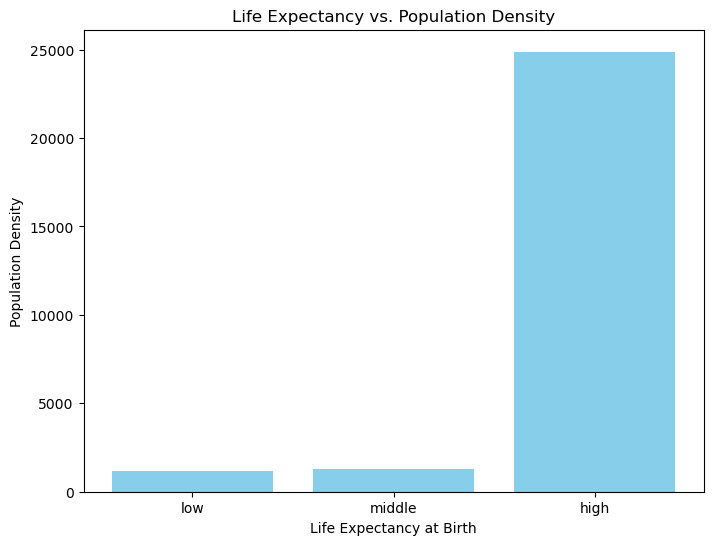

In [ ]:
categories = just_countries_years['Life Expectancy at Birth, both sexes (years)']
values = just_countries_years['Population Density'] # Values for each category

# Create a bar plot
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
plt.bar(categories, values, color='skyblue')

# Adding labels and title
plt.xlabel('Life Expectancy at Birth')
plt.ylabel('Population Density')
plt.title('Life Expectancy vs. Population Density')

# Show the plot
plt.show()

In [ ]:
just_countries_years['Population Density'] = just_countries_years['Population Density'].astype(float)


In [ ]:
# Function to remove spaces and convert to float
def remove_spaces_and_convert_to_float(value):
    if isinstance(value, str):
        value_without_space = re.sub(r'\s+', '', value)
        return float(value_without_space)
    else:
        return value

# Apply the function to the column
just_countries_years['Male Pop'] = just_countries_years['Male Pop'].apply(lambda x: remove_spaces_and_convert_to_float(x))

In [ ]:
just_countries_years['Male Pop'] = just_countries_years['Male Pop'].astype(float)

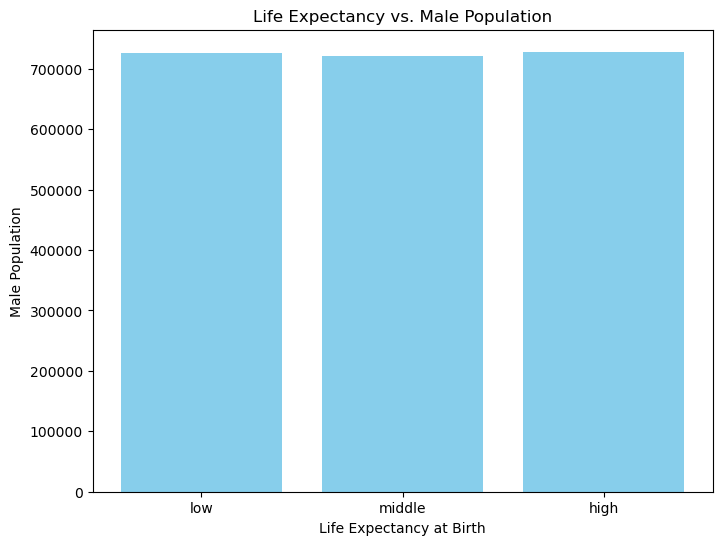

In [ ]:
categories = just_countries_years['Life Expectancy at Birth, both sexes (years)']
values = just_countries_years['Male Pop'] # Values for each category


# Create a bar plot
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
plt.bar(categories, values, color='skyblue')


# Adding labels and title
plt.xlabel('Life Expectancy at Birth')
plt.ylabel('Male Population')
plt.title('Life Expectancy vs. Male Population')

# Show the plot
plt.show()

In [ ]:
just_countries_years['Total Pop'] = just_countries_years['Total Pop'].apply(lambda x: remove_spaces_and_convert_to_float(x))

/var/folders/6m/rxmrjq2j1ds281fy_bft3klr0000gn/T/ipykernel_67658/2707886933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_countries_years['Total Pop'] = just_countries_years['Total Pop'].apply(lambda x: remove_spaces_and_convert_to_float(x))


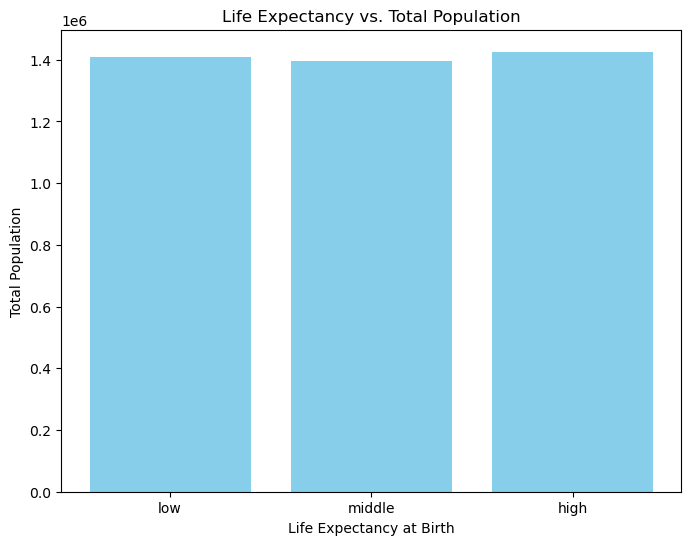

In [ ]:
categories = just_countries_years['Life Expectancy at Birth, both sexes (years)']
values = just_countries_years['Total Pop'] # Values for each category


# Create a bar plot
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
plt.bar(categories, values, color='skyblue')


# Adding labels and title
plt.xlabel('Life Expectancy at Birth')
plt.ylabel('Total Population')
plt.title('Life Expectancy vs. Total Population')

# Show the plot
plt.show()

In [ ]:
just_countries_years['Median Age, as of 1 July (years)'] = just_countries_years['Median Age, as of 1 July (years)'].apply(lambda x: remove_spaces_and_convert_to_float(x))

/var/folders/6m/rxmrjq2j1ds281fy_bft3klr0000gn/T/ipykernel_67658/4187479566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_countries_years['Median Age, as of 1 July (years)'] = just_countries_years['Median Age, as of 1 July (years)'].apply(lambda x: remove_spaces_and_convert_to_float(x))


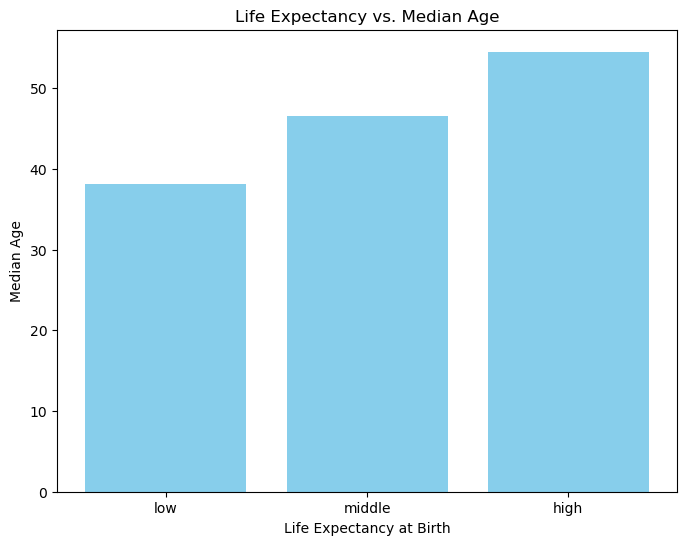

In [ ]:
categories = just_countries_years['Life Expectancy at Birth, both sexes (years)']
values = just_countries_years['Median Age, as of 1 July (years)'] # Values for each category


# Create a bar plot
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
plt.bar(categories, values, color='skyblue')


# Adding labels and title
plt.xlabel('Life Expectancy at Birth')
plt.ylabel('Median Age')
plt.title('Life Expectancy vs. Median Age')

# Show the plot
plt.show()

In [ ]:
just_countries_years['Total Deaths (thousands)'] = just_countries_years['Total Deaths (thousands)'].apply(lambda x: remove_spaces_and_convert_to_float(x))

/var/folders/6m/rxmrjq2j1ds281fy_bft3klr0000gn/T/ipykernel_67658/3921891739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_countries_years['Total Deaths (thousands)'] = just_countries_years['Total Deaths (thousands)'].apply(lambda x: remove_spaces_and_convert_to_float(x))


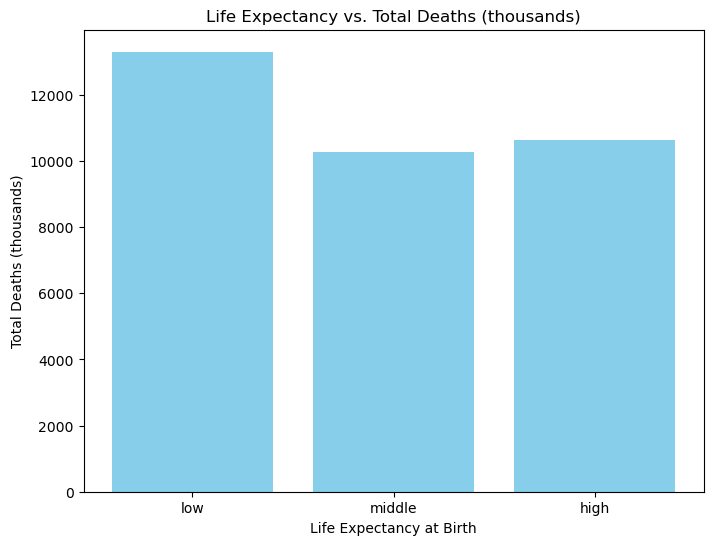

In [ ]:
categories = just_countries_years['Life Expectancy at Birth, both sexes (years)']
values = just_countries_years['Total Deaths (thousands)'] # Values for each category


# Create a bar plot
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
plt.bar(categories, values, color='skyblue')


# Adding labels and title
plt.xlabel('Life Expectancy at Birth')
plt.ylabel('Total Deaths (thousands)')
plt.title('Life Expectancy vs. Total Deaths (thousands)')

# Show the plot
plt.show()

In [ ]:
just_countries_years['Infant Mortality Rate (infant deaths per 1,000 live births)'] = just_countries_years['Infant Mortality Rate (infant deaths per 1,000 live births)'].apply(lambda x: remove_spaces_and_convert_to_float(x))

/var/folders/6m/rxmrjq2j1ds281fy_bft3klr0000gn/T/ipykernel_67658/3984615340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_countries_years['Infant Mortality Rate (infant deaths per 1,000 live births)'] = just_countries_years['Infant Mortality Rate (infant deaths per 1,000 live births)'].apply(lambda x: remove_spaces_and_convert_to_float(x))


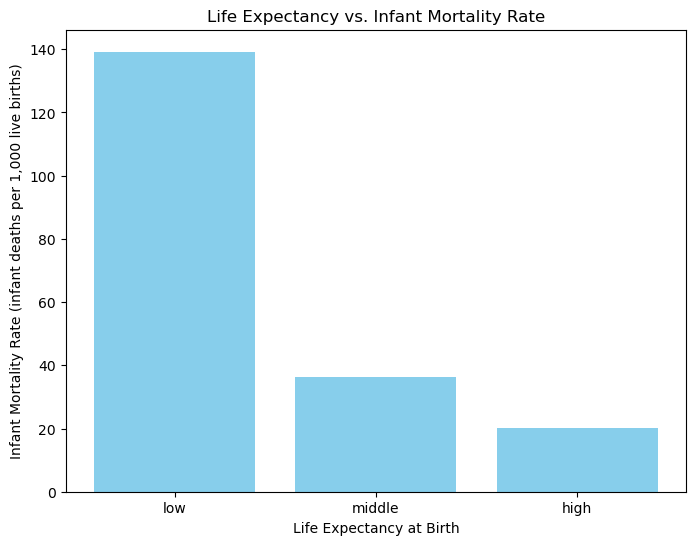

In [ ]:
categories = just_countries_years['Life Expectancy at Birth, both sexes (years)']
values = just_countries_years['Infant Mortality Rate (infant deaths per 1,000 live births)'] # Values for each category


# Create a bar plot
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
plt.bar(categories, values, color='skyblue')


# Adding labels and title
plt.xlabel('Life Expectancy at Birth')
plt.ylabel('Infant Mortality Rate (infant deaths per 1,000 live births)')
plt.title('Life Expectancy vs. Infant Mortality Rate')

# Show the plot
plt.show()

In [ ]:
data = data.drop(['Index','Variant', 'Notes','Location code', 'ISO2 Alpha-code','SDMX code**','Parent code','Total Population, as of 1 January (thousands)','Population Annual Doubling Time (years)'], axis=1) 
#eventuually drop country names and just use their alpha 3 code 
# # sort by type - only keep country/area!!!
# only years after 2000               

In [ ]:
just_countries_years['']

### MODEL BUILDING

In [163]:
just_countries_years = just_countries_years.drop(['ISO3 Alpha-code','Type'], axis=1)

In [164]:
range = (just_countries_years['Life Expectancy at Birth, both sexes (years)'].max()) - (just_countries_years['Life Expectancy at Birth, both sexes (years)'].min()) 
range

44.5

In [165]:
X = just_countries_years.drop('Life Expectancy at Birth, both sexes (years)', axis=1)
y = just_countries_years['Life Expectancy at Birth, both sexes (years)']

In [166]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5192 entries, 1782 to 20595
Data columns (total 23 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Year                                                                                         5192 non-null   float64
 1   Total Pop                                                                                    5192 non-null   float64
 2   Population Density                                                                           5192 non-null   float64
 3   Population Sex Ratio, as of 1 July (males per 100 females)                                   5192 non-null   float64
 4   Median Age, as of 1 July (years)                                                             5192 non-null   float64
 5   Natural Change, Births minus Deaths

In [167]:
y.info()  

<class 'pandas.core.series.Series'>
Index: 5192 entries, 1782 to 20595
Series name: Life Expectancy at Birth, both sexes (years)
Non-Null Count  Dtype  
--------------  -----  
5192 non-null   float64
dtypes: float64(1)
memory usage: 81.1 KB


In [168]:
X.head()

,Year,Total Pop,Population Density,"Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)","Natural Change, Births minus Deaths (thousands)","Rate of Natural Change (per 1,000 population)",Population Growth Rate (percentage),"Crude Birth Rate (births per 1,000 population)",Total Fertility Rate (live births per woman),...,"Crude Death Rate (deaths per 1,000 population)","Life Expectancy at Age 15, both sexes (years)","Life Expectancy at Age 65, both sexes (years)","Life Expectancy at Age 80, both sexes (years)","Infant Mortality Rate (infant deaths per 1,000 live births)","Under-Five Mortality (deaths under age 5 per 1,000 live births)","Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)","Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Net Migration Rate (per 1,000 population)"
1782,2000.0,6308.0,243.1,97.0,14.7,168.0,26.6,2.03,42.5,6.87,...,15.9,44.6,11.3,4.9,95.3,157.0,373.0,553.0,431.0,-6.3
1783,2001.0,6466.0,249.2,97.0,14.9,178.0,27.6,2.91,42.9,6.85,...,15.3,45.2,11.5,5.0,92.4,151.0,361.0,539.0,420.0,1.5
1784,2002.0,6649.0,256.2,97.1,15.1,195.0,29.3,2.68,43.8,6.82,...,14.5,46.4,11.7,5.1,89.1,145.0,340.0,514.0,394.0,-2.5
1785,2003.0,6861.0,264.4,97.1,15.3,209.0,30.5,3.58,44.5,6.79,...,14.0,47.0,11.9,5.1,86.0,139.0,326.0,498.0,381.0,5.4
1786,2004.0,7120.0,274.4,97.2,15.5,227.0,31.9,3.85,45.3,6.75,...,13.4,47.8,12.0,5.2,82.4,132.0,310.0,480.0,365.0,6.6


In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=22)
X_tune, X_test, y_tune, y_test = train_test_split(X_test,y_test,  train_size = 0.50,random_state=48)

In [170]:
kf =RepeatedKFold(n_splits=10,n_repeats =5, random_state=42)

In [171]:
scoring= ['neg_mean_squared_error','r2','neg_mean_absolute_error']
param={"max_depth" : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

In [172]:
#this is the regressor model we will use!
reg=DecisionTreeRegressor(random_state=30)

#setting up search for the best decisiontreeregressor estimator based on r-squared across all different folds
search = GridSearchCV(reg, param, scoring=scoring, n_jobs=-1, cv=kf,refit='r2')

#executing the search
model = search.fit(X_train, y_train)

In [173]:
best= model.best_estimator_
print(best) 
#the best depth is 10

DecisionTreeRegressor(max_depth=14, random_state=30)


In [174]:
dot_data = export_graphviz(best, out_file =None,
               feature_names =X.columns, #feature names from dataset
               filled=True, 
                rounded=True, ) 
               
graph=graphviz.Source(dot_data)

In [175]:
print(graph)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births) <= 235.5\nsquared_error = 74.947\nsamples = 4153\nvalue = 71.105", fillcolor="#eead7e"] ;
1 [label="Life Expectancy at Age 15, both sexes (years) <= 62.25\nsquared_error = 17.403\nsamples = 2906\nvalue = 75.845", fillcolor="#eb9f68"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Life Expectancy at Age 15, both sexes (years) <= 58.95\nsquared_error = 5.423\nsamples = 1559\nvalue = 72.611", fillcolor="#eda877"] ;
1 -> 2 ;
3 [label="Life Expectancy at Age 15, both sexes (years) <= 57.25\nsquared_error = 2.166\nsamples = 668\nvalue = 70.393", fillcolor="#eeaf81"] ;
2 -> 3 ;
4 [label="Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births) <= 78.5\nsquared_error = 1.188\nsamples = 281\nvalue = 69.157", fillcolor="#efb286"] ;
3 

In [176]:
#scores based on depth

#Scores: 

#Have negative mean squared error so need to take absolute value and square root to convert to root mean squared error
mean_sq_err = np.sqrt(abs(model.cv_results_['mean_test_neg_mean_squared_error']))

#nothing needs to be done for r2, it is the same
r2= model.cv_results_['mean_test_r2']

#Have negative mean absolute error so need to take absolute value
mae= abs(model.cv_results_['mean_test_neg_mean_absolute_error'])

#Get standard deviations as well...
SDmse =  model.cv_results_['std_test_neg_mean_squared_error']
SDr2= model.cv_results_['std_test_r2']
SDmae= model.cv_results_['std_test_neg_mean_absolute_error']

#Parameter:
depth= np.unique(model.cv_results_['param_max_depth']).data

#Build DataFrame:
final_model = pd.DataFrame(list(zip(depth, mean_sq_err, r2,mae, SDmse,SDr2,SDmae)),
               columns =['depth','rmse','r2','mae',"rmseSD",'r2SD','maeSD'])

print(final_model.head(10))

   depth      rmse        r2       mae    rmseSD      r2SD     maeSD
0      1  4.755913  0.697185  3.892454  1.160831  0.013402  0.100649
1      2  2.642055  0.906494  2.180608  0.431906  0.006077  0.067688
2      3  1.497822  0.969981  1.201505  0.156302  0.001679  0.034409
3      4  0.967271  0.987468  0.750058  0.083747  0.001139  0.031961
4      5  0.701731  0.993399  0.540663  0.046154  0.000678  0.021219
5      6  0.559935  0.995796  0.415102  0.036247  0.000520  0.019691
6      7  0.456303  0.997209  0.333265  0.026973  0.000370  0.013559
7      8  0.387553  0.997985  0.270992  0.020571  0.000305  0.014174
8      9  0.354659  0.998315  0.237490  0.026892  0.000351  0.012768
9     10  0.339590  0.998457  0.219882  0.026697  0.000340  0.012081


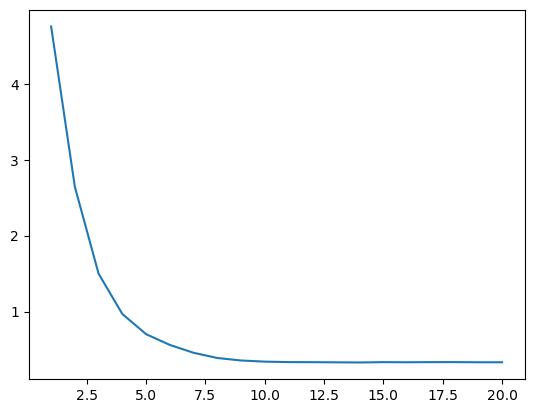

In [177]:
print(plt.plot(final_model.depth, final_model.rmse))

In [178]:
varimp=pd.DataFrame(best.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance', ascending=False)
print(varimp)

                                                    importance
Mortality before Age 60, both sexes (deaths und...    0.702526
Life Expectancy at Age 15, both sexes (years)         0.158913
Mortality before Age 40, both sexes (deaths und...    0.134036
Infant Mortality Rate (infant deaths per 1,000 ...    0.002290
Under-Five Mortality (deaths under age 5 per 1,...    0.000797
Life Expectancy at Age 65, both sexes (years)         0.000549
Life Expectancy at Age 80, both sexes (years)         0.000205
Crude Death Rate (deaths per 1,000 population)        0.000187
Population Sex Ratio, as of 1 July (males per 1...    0.000106
Total Pop                                             0.000058
Mean Age Childbearing (years)                         0.000049
Natural Change, Births minus Deaths (thousands)       0.000040
Rate of Natural Change (per 1,000 population)         0.000034
Sex Ratio at Birth (males per 100 female births)      0.000034
Mortality between Age 15 and 60, both sexes (de...    0

Axes(0.125,0.11;0.775x0.77)


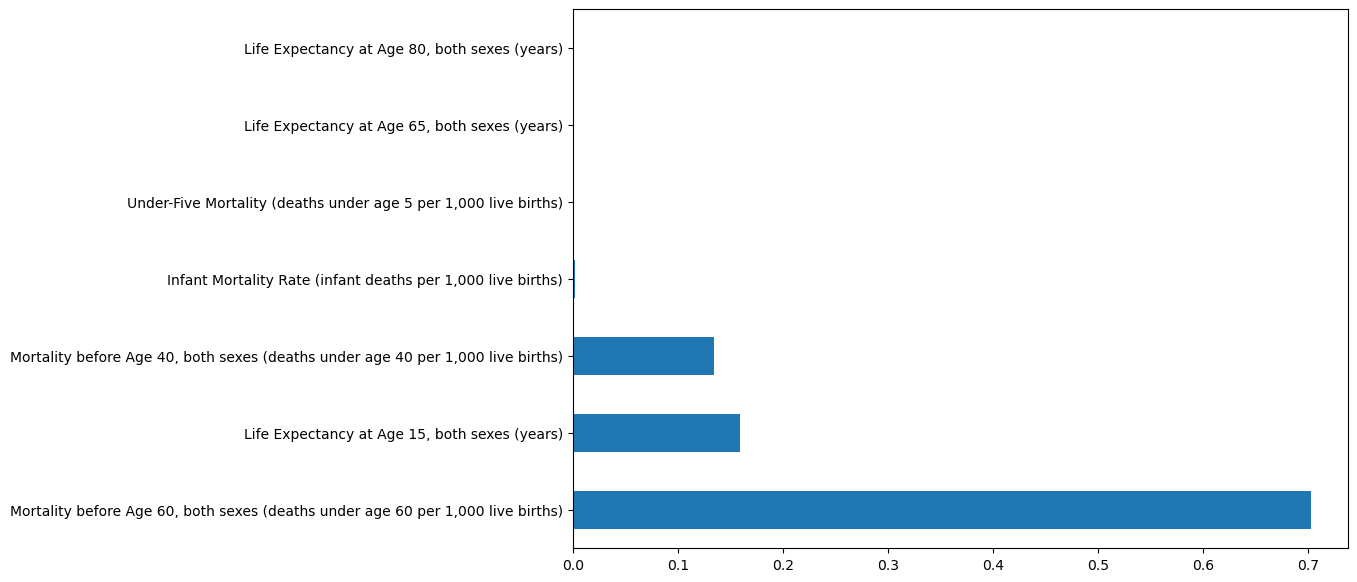

In [179]:
plt.figure(figsize=(10,7))
print(varimp.importance.nlargest(7).plot(kind='barh'))

In [180]:
pred=best.predict(X_test)
print(pred[:10])

[60.7 74.2 65.5 48.4 68.  69.4 81.9 70.5 72.9 83.2]


In [181]:
#This number is Rsquared which we want to be close to 1. 
print(metrics.r2_score(y_test, pred))

0.9987428817656101


In [182]:
#We want this number, RSME, to be less than .5  -
print(np.sqrt(metrics.mean_squared_error(y_test, pred))) 

#MAE we want to be below .5 as well 
print(metrics.mean_absolute_error(y_test, pred)) #nice!

0.3086045591697331
0.1998241758241759


In [183]:
#remaining data

pred=best.predict(X_tune)
print(pred[:10])

#just using test data
print(best.score(X_tune, y_tune))

[73.3 72.8 77.  49.3 75.9 72.4 80.  66.7 45.9 80.4]
0.998442704181191


In [184]:
# Get the probabilities of the predictions
reg.fit(X_test, y_test)
predictions = reg.predict(X)

In [185]:
#country code
top_predictions = [data2['ISO3 Alpha-code'] for just_countries_years['Life Expectancy at Birth, both sexes (years)'] in predictions.argsort()]
top_predictions

[1782     BDI
 1783     BDI
 1784     BDI
 1785     BDI
 1786     BDI
         ... 
 20591    WLF
 20592    WLF
 20593    WLF
 20594    WLF
 20595    WLF
 Name: ISO3 Alpha-code, Length: 5192, dtype: object,
 1782     BDI
 1783     BDI
 1784     BDI
 1785     BDI
 1786     BDI
         ... 
 20591    WLF
 20592    WLF
 20593    WLF
 20594    WLF
 20595    WLF
 Name: ISO3 Alpha-code, Length: 5192, dtype: object,
 1782     BDI
 1783     BDI
 1784     BDI
 1785     BDI
 1786     BDI
         ... 
 20591    WLF
 20592    WLF
 20593    WLF
 20594    WLF
 20595    WLF
 Name: ISO3 Alpha-code, Length: 5192, dtype: object,
 1782     BDI
 1783     BDI
 1784     BDI
 1785     BDI
 1786     BDI
         ... 
 20591    WLF
 20592    WLF
 20593    WLF
 20594    WLF
 20595    WLF
 Name: ISO3 Alpha-code, Length: 5192, dtype: object,
 1782     BDI
 1783     BDI
 1784     BDI
 1785     BDI
 1786     BDI
         ... 
 20591    WLF
 20592    WLF
 20593    WLF
 20594    WLF
 20595    WLF
 Name: ISO3 Alpha-

In [186]:
#life expectancy
top_predictions = [data2['Life Expectancy at Birth, both sexes (years)'] for just_countries_years['Life Expectancy at Birth, both sexes (years)'] in predictions.argsort()]
top_predictions

[1782     47.5
 1783     48.4
 1784     49.9
 1785     50.9
 1786     52.0
          ... 
 20591    77.5
 20592    77.9
 20593    79.6
 20594    78.8
 20595    78.4
 Name: Life Expectancy at Birth, both sexes (years), Length: 5192, dtype: float64,
 1782     47.5
 1783     48.4
 1784     49.9
 1785     50.9
 1786     52.0
          ... 
 20591    77.5
 20592    77.9
 20593    79.6
 20594    78.8
 20595    78.4
 Name: Life Expectancy at Birth, both sexes (years), Length: 5192, dtype: float64,
 1782     47.5
 1783     48.4
 1784     49.9
 1785     50.9
 1786     52.0
          ... 
 20591    77.5
 20592    77.9
 20593    79.6
 20594    78.8
 20595    78.4
 Name: Life Expectancy at Birth, both sexes (years), Length: 5192, dtype: float64,
 1782     47.5
 1783     48.4
 1784     49.9
 1785     50.9
 1786     52.0
          ... 
 20591    77.5
 20592    77.9
 20593    79.6
 20594    78.8
 20595    78.4
 Name: Life Expectancy at Birth, both sexes (years), Length: 5192, dtype: float64,
 1782   

In [188]:
sorted = data2.sort_values(by = 'Life Expectancy at Birth, both sexes (years)', ascending =True)
sorted


,ISO3 Alpha-code,Type,Year,Total Pop,Population Density,"Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)","Natural Change, Births minus Deaths (thousands)","Rate of Natural Change (per 1,000 population)",Population Growth Rate (percentage),...,"Life Expectancy at Birth, both sexes (years)","Life Expectancy at Age 15, both sexes (years)","Life Expectancy at Age 65, both sexes (years)","Life Expectancy at Age 80, both sexes (years)","Infant Mortality Rate (infant deaths per 1,000 live births)","Under-Five Mortality (deaths under age 5 per 1,000 live births)","Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)","Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Net Migration Rate (per 1,000 population)"
3151,ZWE,Country/Area,2001.0,11911.0,30.8,90.3,16.9,203.0,16.9,0.55,...,42.0,32.1,10.9,6.4,58.9,94.0,476.0,791.0,763.0,-11.4
4667,SWZ,Country/Area,2005.0,1072.0,61.7,92.8,17.3,14.0,12.7,0.53,...,42.1,33.8,10.8,6.4,82.0,119.0,456.0,767.0,728.0,-7.4
4666,SWZ,Country/Area,2004.0,1066.0,61.4,92.8,17.1,14.0,13.3,0.61,...,42.5,34.3,10.9,6.3,82.3,120.0,447.0,757.0,716.0,-7.2
4740,LSO,Country/Area,2006.0,1977.0,65.1,95.7,19.2,16.0,8.2,0.26,...,42.9,34.4,10.4,6.3,87.5,116.0,429.0,758.0,720.0,-5.6
4741,LSO,Country/Area,2007.0,1983.0,65.3,95.8,19.4,18.0,9.0,0.42,...,43.1,34.5,10.5,6.4,86.1,114.0,427.0,756.0,717.0,-4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14111,MCO,Country/Area,2017.0,37.0,24862.1,96.2,53.8,-0.0,-12.5,-0.12,...,85.7,71.1,22.7,10.9,4.3,5.0,11.0,34.0,28.0,11.3
14115,MCO,Country/Area,2021.0,37.0,24621.5,96.1,54.5,-0.0,-12.5,-0.68,...,85.9,71.3,22.7,11.0,3.6,4.0,9.0,29.0,24.0,5.6
14112,MCO,Country/Area,2018.0,37.0,24851.7,96.1,54.0,-0.0,-10.9,0.03,...,86.5,71.9,23.3,11.4,3.9,5.0,9.0,30.0,25.0,11.3
14113,MCO,Country/Area,2019.0,37.0,24855.0,96.1,54.3,-0.0,-11.2,-0.01,...,86.5,72.0,23.4,11.4,3.9,4.0,9.0,30.0,25.0,11.3
